In [2]:
# Exploratory Data Analysis (EDA) Notebook

## Load Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")


Load Data

In [4]:
# Load the dataset
data = pd.read_csv('../data/processed/processed_data.csv')

# Display the first few rows of the dataframe
data.head()


,Timestamp,Temperature (°C),Vibration (mm/s),Pressure (Pa),RPM,Maintenance Required,Temp_Change,Vib_Change
0,2019-01-01 00:00:00,0.548793,0.509840,0.619918,0.741161,1,0.501129,0.499619
1,2019-01-01 01:00:00,0.715185,0.587573,0.802121,0.292862,1,0.584882,0.538630
2,2019-01-01 02:00:00,0.602748,0.294453,0.965546,0.624416,1,0.444534,0.352514
3,2019-01-01 03:00:00,0.544862,0.500041,0.519955,0.931955,0,0.471992,0.602794
4,2019-01-01 04:00:00,0.423622,0.031649,0.323663,0.799867,0,0.440103,0.264552


In [5]:
# Display basic information about the dataset
data.info()

# Summary statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             43800 non-null  object 
 1   Temperature (°C)      43800 non-null  float64
 2   Vibration (mm/s)      43800 non-null  float64
 3   Pressure (Pa)         43800 non-null  float64
 4   RPM                   43800 non-null  float64
 5   Maintenance Required  43800 non-null  int64  
 6   Temp_Change           43800 non-null  float64
 7   Vib_Change            43800 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.7+ MB


,Temperature (°C),Vibration (mm/s),Pressure (Pa),RPM,Maintenance Required,Temp_Change,Vib_Change
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,0.497752,0.500139,0.502902,0.500764,0.500776,0.501133,0.499622
std,0.289543,0.288612,0.289589,0.288880,0.500005,0.206076,0.205033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.246304,0.248662,0.250924,0.250167,0.000000,0.352515,0.352197
50%,0.497589,0.500018,0.504503,0.503002,1.000000,0.501690,0.498956
75%,0.749073,0.749795,0.755002,0.749166,1.000000,0.649000,0.647563
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

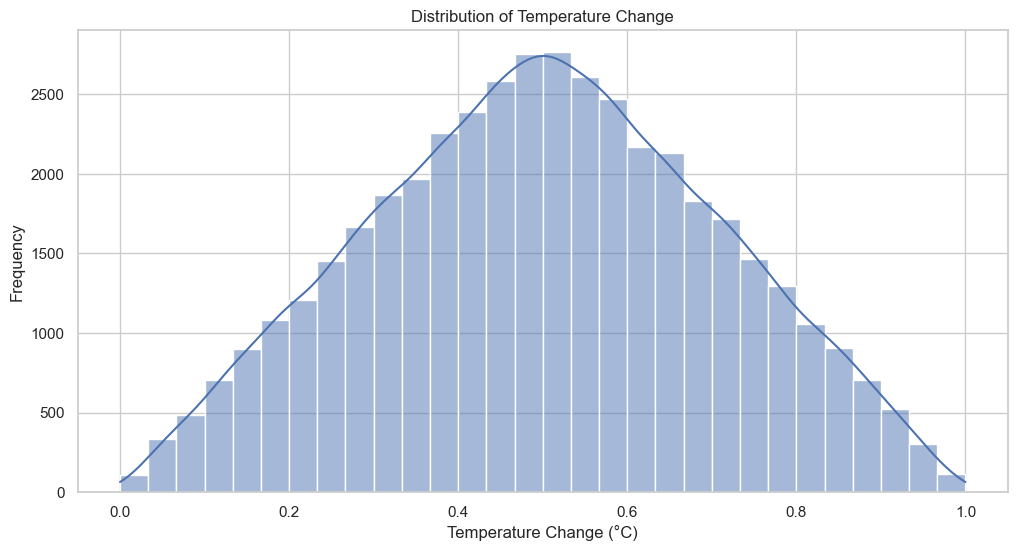

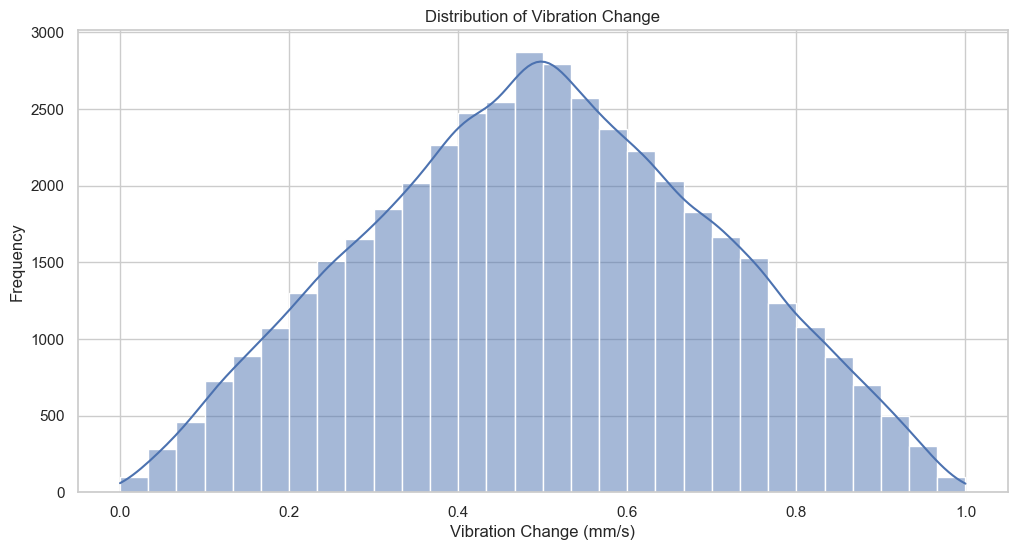

In [8]:
# Plot the distribution of temperature changes
plt.figure(figsize=(12, 6))
sns.histplot(data['Temp_Change'], bins=30, kde=True)
plt.title('Distribution of Temperature Change')
plt.xlabel('Temperature Change (°C)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of vibration changes
plt.figure(figsize=(12, 6))
sns.histplot(data['Vib_Change'], bins=30, kde=True)
plt.title('Distribution of Vibration Change')
plt.xlabel('Vibration Change (mm/s)')
plt.ylabel('Frequency')
plt.show()

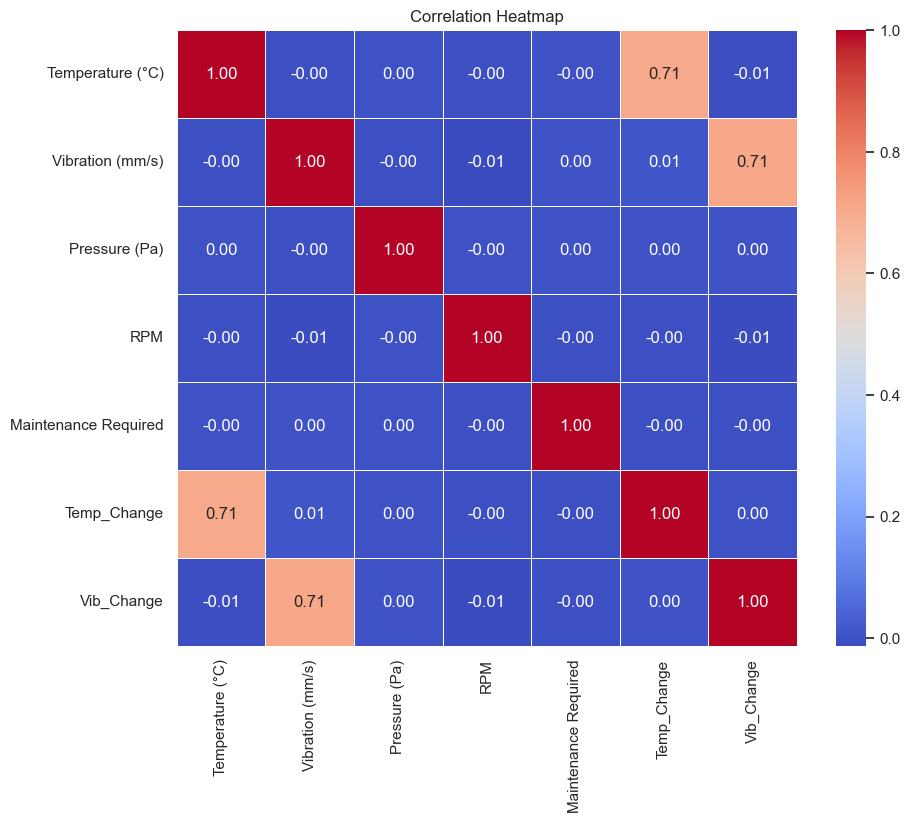

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


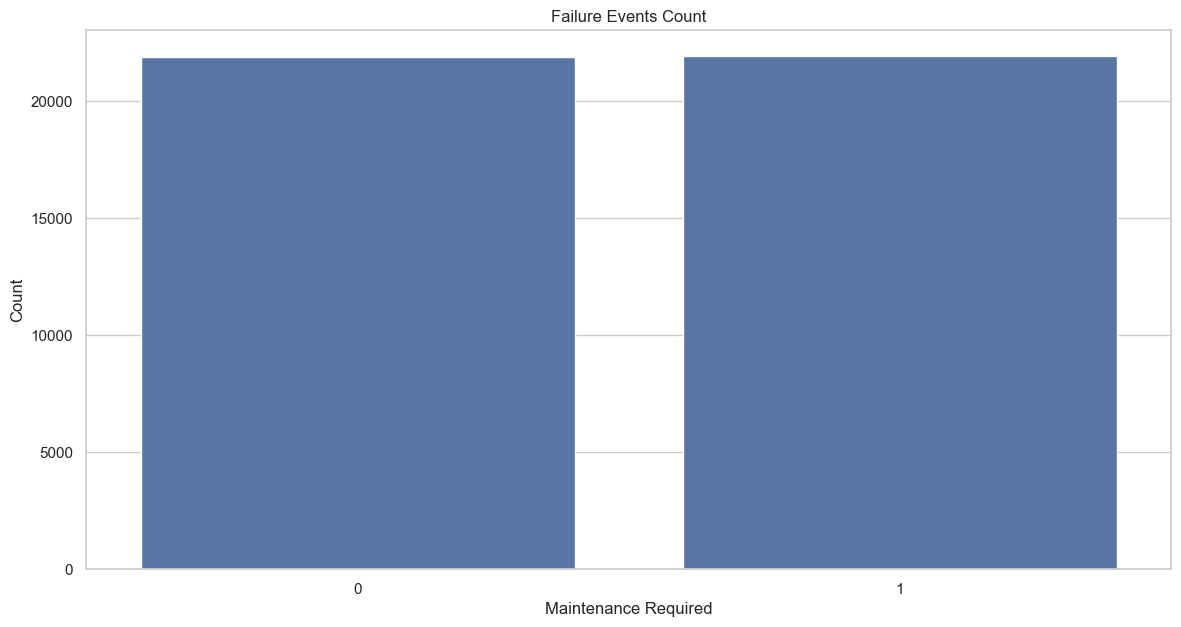

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot failures over time, assuming 'Maintenance Required' indicates failure
plt.figure(figsize=(14, 7))
sns.countplot(x='Maintenance Required', data=data)
plt.title('Failure Events Count')
plt.xlabel('Maintenance Required')
plt.ylabel('Count')
plt.show()
